In [17]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Sanskruti Dixit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [20]:
df = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df = df.dropna(subset=['Description'])


In [24]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [25]:
df = df[df['Quantity'] > 0]


In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [29]:
df['InvoiceDate'].dtype


dtype('<M8[us]')

In [30]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='str')

In [31]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [32]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Month_Name'] = df['InvoiceDate'].dt.month_name()
df['Week'] = df['InvoiceDate'].dt.isocalendar().week


In [33]:
weekly_revenue = df.groupby('Week')['Revenue'].sum()

weekly_revenue.head()


Week
1    133658.19
2    193362.04
3    215533.18
4    125170.79
5    125990.68
Name: Revenue, dtype: float64

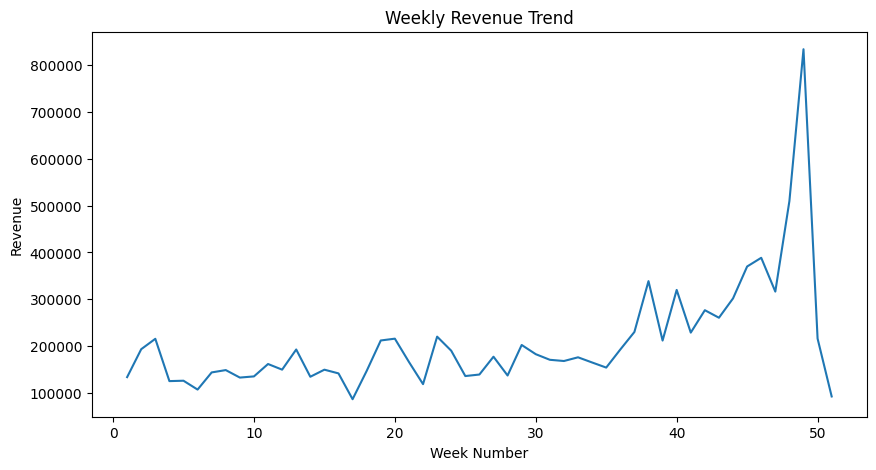

In [34]:
plt.figure(figsize=(10,5))
weekly_revenue.plot()
plt.title("Weekly Revenue Trend")
plt.xlabel("Week Number")
plt.ylabel("Revenue")
plt.show()


In [35]:
monthly_revenue = df.groupby('Month_Name')['Revenue'].sum()

monthly_revenue = monthly_revenue.sort_values(ascending=False)

monthly_revenue


Month_Name
November     1509496.330
December     1462538.820
October      1154979.300
September    1058590.172
May           770536.020
June          761739.900
August        737014.260
July          719221.191
March         717639.360
January       691364.560
April         537808.621
February      523631.890
Name: Revenue, dtype: float64

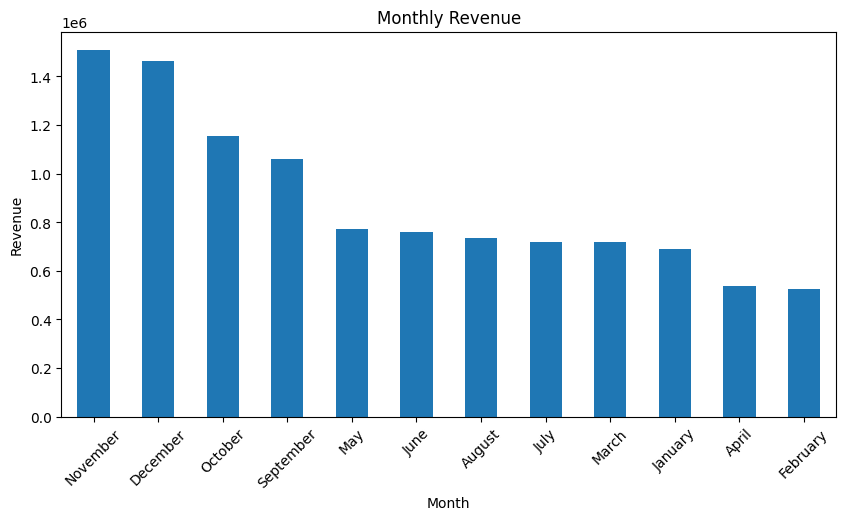

In [36]:
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [37]:
yearly_revenue = df.groupby('Year')['Revenue'].sum()

yearly_revenue


Year
2010     823746.140
2011    9820814.284
Name: Revenue, dtype: float64

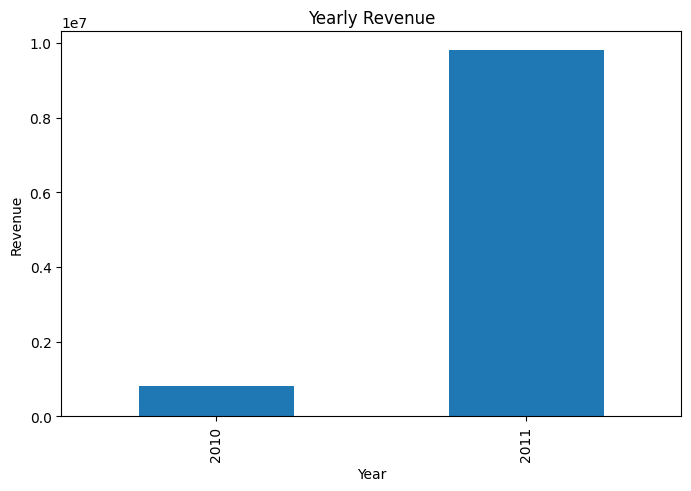

In [38]:
plt.figure(figsize=(8,5))
yearly_revenue.plot(kind='bar')
plt.title("Yearly Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()


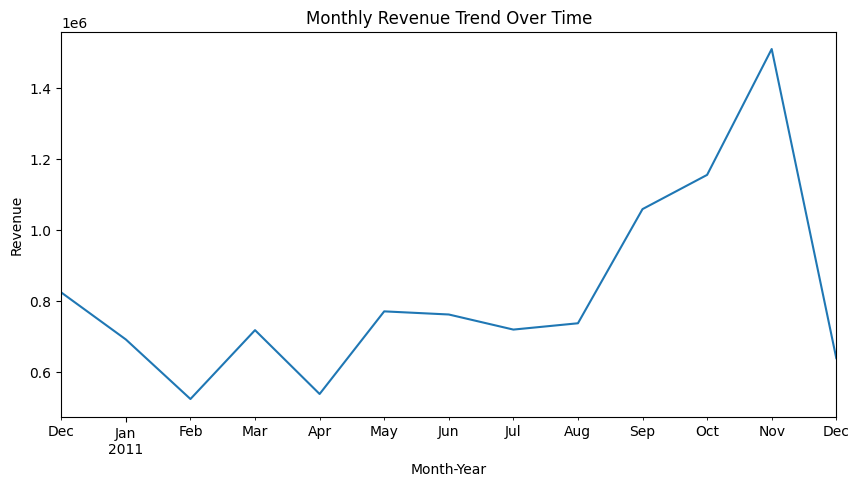

In [39]:
monthly_trend = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Revenue'].sum()

monthly_trend.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.show()


In [40]:
bottom_10_products = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values()
    .head(10)
)

bottom_10_products


Description
Adjust bad debt                       -11062.06
to push order througha s stock was         0.00
returned                                   0.00
wrongly sold (22719) barcode               0.00
on cargo order                             0.00
wrongly marked 23343                       0.00
wrongly marked                             0.00
rcvd be air temp fix for dotcom sit        0.00
check?                                     0.00
amazon sales                               0.00
Name: Revenue, dtype: float64

In [ ]:
top_products = df['Description'].value_counts().head(10)
top_products


Description
WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: count, dtype: int64

In [ ]:
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue


Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue.head(10)


Country
United Kingdom    9003097.964
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

In [ ]:
top_200_products = df['Description'].value_counts().head(200).index
df = df[df['Description'].isin(top_200_products)]


In [ ]:
df.to_csv("cleaned_data.csv", index=False)
